In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

In [2]:
df = pd.read_excel('signal_feature.xlsx')
del df['Unnamed: 0']

In [3]:
df.head()

,signal,path,mfcc,mfcc_mean,zcr,sc,rms,melspectrogram
0,2,F:\RMS Samples\S2\A17BA_12055_1333_27_08_2017.MP3,[-1.19005562e+02 2.06678009e+02 -1.05538704e+...,0.055562,0.114928,1463.040193,0.145157,4.540862
1,2,F:\RMS Samples\S2\A17BA_12055_1336_27_08_2017.MP3,[-1.1469097e+02 2.1500935e+02 -1.1449629e+02 ...,0.384692,0.119250,1484.006563,0.147916,4.452103
2,2,F:\RMS Samples\S2\A17BA_12055_1341_27_08_2017.MP3,[-1.22675224e+02 2.07198257e+02 -1.02659149e+...,0.464670,0.109778,1413.981019,0.134147,3.892156
3,2,F:\RMS Samples\S2\A17BA_12055_1346_27_08_2017.MP3,[-1.1597163e+02 2.1474585e+02 -1.1746875e+02 ...,0.278849,0.119023,1495.144218,0.147518,4.409816
4,2,F:\RMS Samples\S2\A17BA_12055_1351_27_08_2017.MP3,[-1.04732437e+02 2.15139145e+02 -1.20868294e+...,0.233441,0.125884,1538.705541,0.154144,4.562316


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
signal            408 non-null int64
path              408 non-null object
mfcc              408 non-null object
mfcc_mean         408 non-null float64
zcr               408 non-null float64
sc                408 non-null float64
rms               408 non-null float64
melspectrogram    408 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 25.6+ KB


In [5]:
df.describe()

,signal,mfcc_mean,zcr,sc,rms,melspectrogram
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,2.509804,-0.973707,0.116621,1545.845107,0.107266,2.815569
std,1.125929,1.552889,0.023544,196.559130,0.044750,1.749397
min,1.000000,-6.808770,0.054692,1044.114408,0.005196,0.001990
25%,1.750000,-1.259390,0.100047,1432.739391,0.083184,1.451741
50%,3.000000,-0.597562,0.115029,1510.920661,0.106676,2.652132
75%,4.000000,-0.018491,0.130557,1604.220208,0.145281,4.129977
max,4.000000,1.469374,0.166038,2541.239780,0.195066,7.741895


In [6]:
df['signal'].value_counts()

4    105
1    102
2    101
3    100
Name: signal, dtype: int64

In [7]:
#np.array(df['mfcc'][1]).astype(np.float)

In [8]:
#sns.distplot(df['mfcc'][78])

In [9]:
df_n = pd.read_csv('signal_feature - Sheet1.csv')

In [10]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
Unnamed: 0        408 non-null int64
signal            408 non-null int64
path              408 non-null object
mfcc              408 non-null object
mfcc_mean         408 non-null float64
zcr               408 non-null float64
sc                408 non-null float64
rms               408 non-null float64
melspectrogram    408 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 28.8+ KB


In [11]:
p = [-1.19005562e+02,2.06678009e+02,-1.05538704e+02,  4.48204079e+01,
     1.11865625e+01, -1.92529087e+01,  1.06882820e+01, -6.18736935e+00, 
     6.10216188e+00, -1.00257215e+01, 2.39508319e+00, 4.69961548e+00,
     -1.31886606e+01,  7.41868591e+00, -1.52671719e+00, -3.83753300e+00,
     3.93492627e+00, -7.81431973e-01,  2.34639859e+00, -4.07584858e+00, 1.93202055e+00,
     6.45269215e-01, -4.63217640e+00,  4.33690834e+00, -2.32549834e+00, -6.85804307e-01, 
     2.59325719e+00, -1.35948873e+00, 1.12610710e+00, -1.97841501e+00, 2.35813826e-01,
     -8.02883685e-01, -2.83340859e+00,  6.75041020e-01, -3.37705207e+00, -1.74651301e+00,
     -1.44945669e+00, -2.96129656e+00 , 2.03646086e-02, -2.03996587e+00]

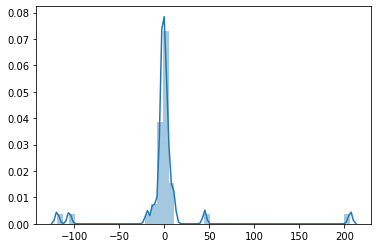

In [12]:
sns.distplot(p)

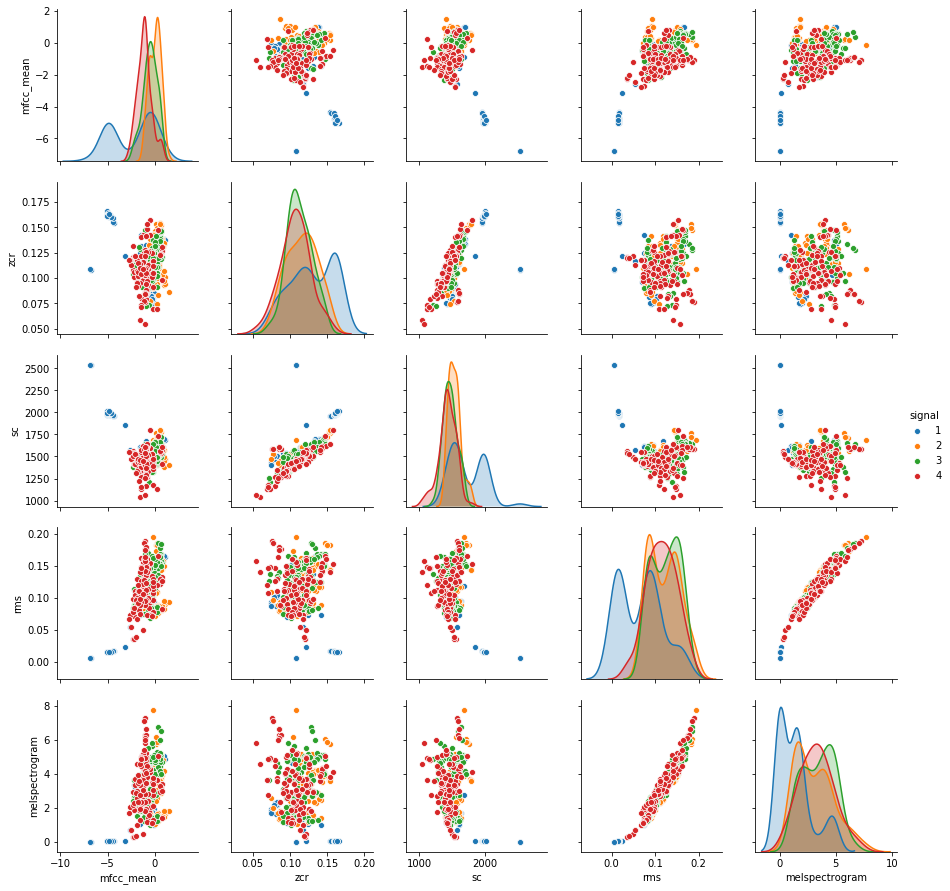

In [13]:
sns.pairplot(df,hue='signal',vars=['mfcc_mean','zcr','sc','rms','melspectrogram'])

In [14]:
df.corrwith(df['signal'])

signal            1.000000
mfcc_mean         0.219337
zcr              -0.337989
sc               -0.551491
rms               0.372336
melspectrogram    0.392615
dtype: float64

In [15]:
df.corr()

,signal,mfcc_mean,zcr,sc,rms,melspectrogram
signal,1.000000,0.219337,-0.337989,-0.551491,0.372336,0.392615
mfcc_mean,0.219337,1.000000,-0.398106,-0.604495,0.720315,0.533069
zcr,-0.337989,-0.398106,1.000000,0.780605,-0.282063,-0.259873
sc,-0.551491,-0.604495,0.780605,1.000000,-0.458126,-0.375024
rms,0.372336,0.720315,-0.282063,-0.458126,1.000000,0.959761
melspectrogram,0.392615,0.533069,-0.259873,-0.375024,0.959761,1.000000


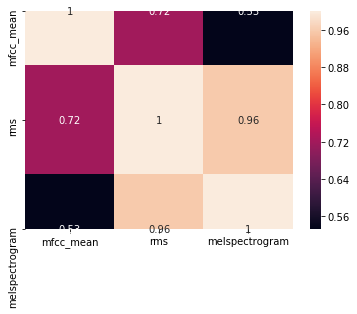

In [16]:
df1 = df[['mfcc_mean','rms','melspectrogram']]
sns.heatmap(df1.corr(),annot=True)

In [17]:
X1 = df[['mfcc_mean','rms','melspectrogram']]
y1 = df['signal']

In [18]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.33,random_state=234)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [20]:
dtc.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
dtc_pred = dtc.predict(X1_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y1_test,dtc_pred))

[[27  3  5  6]
 [ 3 20  8  3]
 [ 2  5 14  7]
 [ 0  5  8 19]]


In [23]:
print(classification_report(y1_test,dtc_pred))

              precision    recall  f1-score   support

           1       0.84      0.66      0.74        41
           2       0.61      0.59      0.60        34
           3       0.40      0.50      0.44        28
           4       0.54      0.59      0.57        32

    accuracy                           0.59       135
   macro avg       0.60      0.59      0.59       135
weighted avg       0.62      0.59      0.60       135



In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(df1)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_data = scaler.transform(df1)


In [27]:
pca = PCA(n_components=3)

In [28]:
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)


In [29]:
var = pca.explained_variance_ratio_

In [46]:
var

array([0.82987169, 0.16667524, 0.00345307])

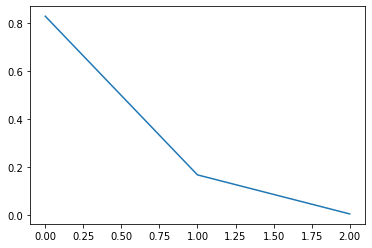

In [30]:
plt.plot(var)

In [31]:
scaled_data.shape


(408, 3)

In [32]:
pca.fit_transform

<bound method PCA.fit_transform of PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)>

In [33]:
pca.explained_variance_ratio_

array([0.82987169, 0.16667524, 0.00345307])

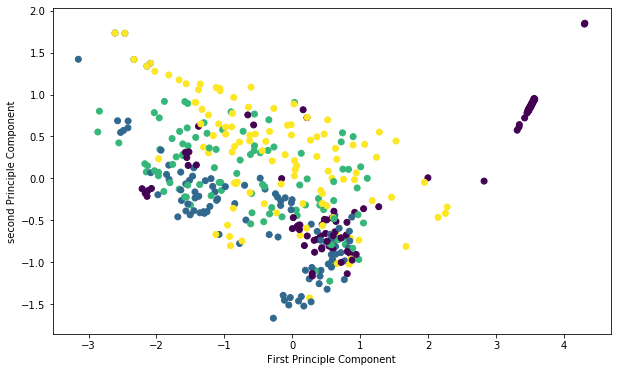

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['signal'])
plt.xlabel('First Principle Component')
plt.ylabel('second Principle Component')
plt.show()

In [35]:
X = x_pca
y = df['signal']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)

In [37]:
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

0.42276422764227645
0.49122807017543857


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
print(dtc.score(X_test,y_test))
print(dtc.score(X_train,y_train))
y_dtc_pred = dtc.predict(X_test)

0.5365853658536586
0.9929824561403509


In [39]:
print(confusion_matrix(y_test,y_dtc_pred))
print(classification_report(y_test,y_dtc_pred))

[[14  0  4  4]
 [ 4 18  7  6]
 [ 7  5 14  9]
 [ 1  2  8 20]]
              precision    recall  f1-score   support

           1       0.54      0.64      0.58        22
           2       0.72      0.51      0.60        35
           3       0.42      0.40      0.41        35
           4       0.51      0.65      0.57        31

    accuracy                           0.54       123
   macro avg       0.55      0.55      0.54       123
weighted avg       0.55      0.54      0.54       123



In [40]:
y_pred = clf.predict(X_test)

In [41]:
print(confusion_matrix(y_test,y_pred))

[[14  7  0  1]
 [ 7 22  2  4]
 [ 8 11  1 15]
 [ 9  6  1 15]]


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.37      0.64      0.47        22
           2       0.48      0.63      0.54        35
           3       0.25      0.03      0.05        35
           4       0.43      0.48      0.45        31

    accuracy                           0.42       123
   macro avg       0.38      0.44      0.38       123
weighted avg       0.38      0.42      0.37       123



In [43]:
from sklearn.svm import SVC
clf = SVC(C=3000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=6e-06, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False).fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train,y_train))

0.5040650406504065
0.4982456140350877


In [44]:
clf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5284552845528455

In [45]:
parameters = {
                'C': [2000, 2500, 3000], # makin kecil, makin besar margin
                'gamma': [0.000001, 0.000003, 0.000006],
                'random_state': [0]
             }

clf = SVC()

grid_obj = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid_obj = grid_obj.fit(X_train, y_train) # pake ini?

scores_log = cross_val_score(grid_obj, X_train, y_train, cv=10)
print('Final CV accuracy: %.3f +/- %.3f' % (np.mean(scores_log), np.std(scores_log)))

NameError: name 'GridSearchCV' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
print(grid_obj.best_estimator_)
print('Best GridSearchCV Score : ' + str(grid_obj.best_score_))

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data.
clf.fit(X_train, y_train)

score_train = clf.score(X_train, y_train)
print('Training Accuracy : ' + str(score_train))

score_test = clf.score(X_test, y_test)
print('Test Accuracy : ' + str(score_test))

In [ ]:
df_test = df[1:10]

In [ ]:
df_test.head()

In [ ]:
df_test['qua'] = df_test['signal'].apply(qua)

In [ ]:
def qua(signal):
    if signal == 1 or signal == 2:
        return 0
    else:
        return 1

In [ ]:
df_test.head()